## About 

A simple python utility that downloads data from the following web portal in form of PDFs and then extracts data from tables:

* https://www.oldenburg.de/startseite/politik/verwaltung-finanzen/statistik/statistische-daten-online/inhaltsverzeichnis.html

## Additional dependencies

* See ```requirements.txt``` file

In [1]:
%matplotlib inline

import os
import tabula
import requests
import pandas as pd
import urllib.parse as urlparse

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

# global IPython settings
plt.style.use('ggplot')

#np.set_printoptions(precision=3)
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

# plt
rcParams['figure.figsize'] = 25, 12

# disabling some warnings
pd.options.mode.chained_assignment = None  # default='warn'

### Download PDF file

In [3]:
def download(url, force_download=False):
    """ Downloads given URL and saves a local file"""
    
    PDFS_DIR = 'PDFs'
    if not os.path.exists(PDFS_DIR):
        print('[i] create following folder: {0}'.format(PDFS_DIR))
        os.makedirs(PDFS_DIR)
            
    r = requests.get(url, stream=True)
    
    if r.status_code == 200:
        _urlparse = urlparse.urlparse(url)
        f_name = os.path.join(PDFS_DIR, os.path.basename(_urlparse.path))
        if (not os.path.exists(f_name) or force_download):
            print('[i] start download for of the url: {}'.format(url))
            print('[i] target file: {}'.format(f_name))
            with open(f_name, 'wb') as fd:
                for chunk in r.iter_content(chunk_size=1024):
                    fd.write(chunk)
            print('[i] finish download')
    else:
        print('[e] Wrong request status code: {0}'.format(r.status_code))
        
    return f_name 

In [4]:
# (old, 2017) 0313 – Lohn- und Einkommensteuer 2010 – Gesamtbetrag der Einkünfte
#url_people_income = 'https://www.oldenburg.de/fileadmin/oldenburg/Benutzer/PDF/40/402/0313-0313-1-2016-Internet.pdf'
# (old, 2018) 0313 - Lohn- und Einkommensteuer 2013 - Gesamtbetrag der Einkünfte
# url_people_income = 'https://www.oldenburg.de/fileadmin/oldenburg/Benutzer/PDF/40/402/0313-0313-1-Internet-2017.pdf'
# (old, 2019) 0313 - Lohn- und Einkommensteuer 2013 - Gesamtbetrag der Einkünfte
# url_people_income = "https://www.oldenburg.de/fileadmin/oldenburg/Benutzer/PDF/40/402/Statistik/0313-0313-1-2017-Internet.pdf"

# 0313 - Lohn- und Einkommensteuer 2014 - Gesamtbetrag der Einkünfte
url_people_income = "https://www.oldenburg.de/fileadmin/oldenburg/Benutzer/PDF/40/402/Statistik/0313-0313-1-2018-DK-Internet.pdf"
pdf_people_income = download(url_people_income, True)

# (old, 2017) 0302-3 – Sozialversicherungspflichtig Beschäftigte am Arbeitsort nach Altersgruppen 2010 bis 2016
# url_people_employment = 'https://www.oldenburg.de/fileadmin/oldenburg/Benutzer/PDF/40/402/0302-2-0302-3-2016-Internet.pdf'
# (old, 2018) 0302-3 – Sozialversicherungspflichtig Beschäftigte am Arbeitsort nach Altersgruppen 2010 bis 2017
# url_people_employment = 'https://www.oldenburg.de/fileadmin/oldenburg/Benutzer/PDF/40/402/0302-2-0302-3-2017-Internet.pdf'

# 0302-3 - Sozialversicherungspflichtig Beschäftigte am Arbeitsort nach Altersgruppen 2011 bis 2017
url_people_employment = 'https://www.oldenburg.de/fileadmin/oldenburg/Benutzer/PDF/40/402/Statistik/0302-2-0302-3-2017-Internet.pdf'
pdf_people_employment = download(url_people_employment, True)

[i] start download for of the url: https://www.oldenburg.de/fileadmin/oldenburg/Benutzer/PDF/40/402/Statistik/0313-0313-1-2018-DK-Internet.pdf
[i] target file: PDFs\0313-0313-1-2018-DK-Internet.pdf
[i] finish download
[i] start download for of the url: https://www.oldenburg.de/fileadmin/oldenburg/Benutzer/PDF/40/402/Statistik/0302-2-0302-3-2017-Internet.pdf
[i] target file: PDFs\0302-2-0302-3-2017-Internet.pdf
[i] finish download


<hr>

## Analysis of the PDF with statistical data on people employment

### Convert PDF into DataFrame (employment data)

In [5]:
# read pdf into DataFrame
# for German langauge use the following encoding = 'cp1252'
df_employment = tabula.read_pdf(pdf_people_employment, encoding = 'cp1252')
df_employment

,Unnamed: 0,Unnamed: 1,Bis mittlere Reife,Abitur,Unnamed: 4,Höhere,Universität,Unnamed: 7
0,Altersgruppen der,NaN,ohne mit,ohne mit,NaN,Fach-,oder,ohne
1,Beschäftigten,insgesamt,NaN,NaN,NaN,schule/ Fachhoch-,entspr.,Angaben
2,NaN,NaN,Berufsausbildung,Berufsausbildung,NaN,schule,Akademie,NaN
3,S 1,S 2,S 3 S 4,S 5 S 6,NaN,S 7,S 8,S 9
4,insgesamt,13.750,890 6.093,534 820,NaN,381,1.790,3.242
5,unter 20 Jahre,73,24 7,12 -,NaN,•,-,29
6,20 bis unter 25 Jahre,684,67 191,163 12,NaN,5,45,201
7,25 bis unter 30 Jahre,1.362,64 387,169 56,NaN,22,348,316
8,30 bis unter 35 Jahre,1.335,63 458,83 90,NaN,39,278,324
9,35 bis unter 40 Jahre,1.361,63 551,38 107,NaN,47,215,340


In [6]:
# load and parse PDF
df_employment = tabula.read_pdf(pdf_people_employment, encoding = 'cp1252')

# identify row index
TBL_START_ROW = 3
TBL_LAST_ROW = 16
index = [x for x in range(TBL_START_ROW, TBL_LAST_ROW)]
print(index)
df_pdf = df_employment.iloc[index,:]

# rename columns
df_pdf.columns = ['col_{0}'.format(x+1) for x in range(len(df_pdf.columns))]
df_pdf

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8
3,S 1,S 2,S 3 S 4,S 5 S 6,NaN,S 7,S 8,S 9
4,insgesamt,13.750,890 6.093,534 820,NaN,381,1.790,3.242
5,unter 20 Jahre,73,24 7,12 -,NaN,•,-,29
6,20 bis unter 25 Jahre,684,67 191,163 12,NaN,5,45,201
7,25 bis unter 30 Jahre,1.362,64 387,169 56,NaN,22,348,316
8,30 bis unter 35 Jahre,1.335,63 458,83 90,NaN,39,278,324
9,35 bis unter 40 Jahre,1.361,63 551,38 107,NaN,47,215,340
10,40 bis unter 45 Jahre,2.028,80 1.005,24 156,NaN,63,210,490
11,45 bis unter 50 Jahre,2.298,131 1.104,25 194,NaN,76,242,526
12,50 bis unter 55 Jahre,1.987,137 978,10 118,NaN,59,205,480


### Separate obtained after conducted import columns into more convenient sub-columns 

In [7]:
df_pdf_tmp = df_pdf
df_pdf_tmp['col_3_1'], df_pdf_tmp['col_3_2'] = df_pdf_tmp['col_3'].str.split(' ', 1).str
df_pdf_tmp['col_4_1'], df_pdf_tmp['col_4_2'] = df_pdf_tmp['col_4'].str.split(' ', 1).str
df_pdf_tmp = df_pdf_tmp.reset_index()
df_pdf_tmp

,index,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_3_1,col_3_2,col_4_1,col_4_2
0,3,S 1,S 2,S 3 S 4,S 5 S 6,NaN,S 7,S 8,S 9,S,3 S 4,S,5 S 6
1,4,insgesamt,13.750,890 6.093,534 820,NaN,381,1.790,3.242,890,6.093,534,820
2,5,unter 20 Jahre,73,24 7,12 -,NaN,•,-,29,24,7,12,-
3,6,20 bis unter 25 Jahre,684,67 191,163 12,NaN,5,45,201,67,191,163,12
4,7,25 bis unter 30 Jahre,1.362,64 387,169 56,NaN,22,348,316,64,387,169,56
5,8,30 bis unter 35 Jahre,1.335,63 458,83 90,NaN,39,278,324,63,458,83,90
6,9,35 bis unter 40 Jahre,1.361,63 551,38 107,NaN,47,215,340,63,551,38,107
7,10,40 bis unter 45 Jahre,2.028,80 1.005,24 156,NaN,63,210,490,80,1.005,24,156
8,11,45 bis unter 50 Jahre,2.298,131 1.104,25 194,NaN,76,242,526,131,1.104,25,194
9,12,50 bis unter 55 Jahre,1.987,137 978,10 118,NaN,59,205,480,137,978,10,118


In [8]:
def custom_replace(df, column):
    df[column] = df[column].astype(str)   # <- to let conversion to srt happen
    df[column] = df[column].apply(lambda x: x.replace('NaN', '0'))
    df[column] = df[column].apply(lambda x: x.replace('-', '0'))
    df[column] = df[column].apply(lambda x: x.replace('•', '0'))
    df[column] = df[column].apply(lambda x: x.replace('.', ''))
    #f[column] = df[column].apply(lambda x: x.replace(',', '.'))
    df[column] = df[column].astype(float) # <- to let conversion happen once

index = [x+1 for x in range(len(df_pdf_tmp)-1)]
print(index)
df_pdf_tmp_v2 = df_pdf_tmp.iloc[index,:]
target_columns = ['col_2', 'col_6', 'col_7', 'col_8', 'col_3_1', 'col_3_2', 'col_4_1', 'col_4_2']
df_target = df_pdf_tmp_v2[target_columns]

# clean/cast
for col in target_columns:
    print ('Replacing values in column: {}'.format(col))
    custom_replace(df_target, col)
    
df_target = df_target[1:] # remove the first row with total sum
df_pdf_tbl1 = df_target
df_pdf_tbl1

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Replacing values in column: col_2
Replacing values in column: col_6
Replacing values in column: col_7
Replacing values in column: col_8
Replacing values in column: col_3_1
Replacing values in column: col_3_2
Replacing values in column: col_4_1
Replacing values in column: col_4_2


,col_2,col_6,col_7,col_8,col_3_1,col_3_2,col_4_1,col_4_2
2,73.0,0.0,0.0,29.0,24.0,7.0,12.0,0.0
3,684.0,5.0,45.0,201.0,67.0,191.0,163.0,12.0
4,1362.0,22.0,348.0,316.0,64.0,387.0,169.0,56.0
5,1335.0,39.0,278.0,324.0,63.0,458.0,83.0,90.0
6,1361.0,47.0,215.0,340.0,63.0,551.0,38.0,107.0
7,2028.0,63.0,210.0,490.0,80.0,1005.0,24.0,156.0
8,2298.0,76.0,242.0,526.0,131.0,1104.0,25.0,194.0
9,1987.0,59.0,205.0,480.0,137.0,978.0,10.0,118.0
10,1548.0,39.0,153.0,304.0,142.0,840.0,8.0,62.0
11,925.0,30.0,79.0,164.0,102.0,528.0,0.0,20.0


### Get back to a meaningful names inside a DataFrame

In [9]:
df_pdf_tbl1['groups'] = df_pdf_tmp['col_1']
df_pdf_tbl1

,col_2,col_6,col_7,col_8,col_3_1,col_3_2,col_4_1,col_4_2,groups
2,73.0,0.0,0.0,29.0,24.0,7.0,12.0,0.0,unter 20 Jahre
3,684.0,5.0,45.0,201.0,67.0,191.0,163.0,12.0,20 bis unter 25 Jahre
4,1362.0,22.0,348.0,316.0,64.0,387.0,169.0,56.0,25 bis unter 30 Jahre
5,1335.0,39.0,278.0,324.0,63.0,458.0,83.0,90.0,30 bis unter 35 Jahre
6,1361.0,47.0,215.0,340.0,63.0,551.0,38.0,107.0,35 bis unter 40 Jahre
7,2028.0,63.0,210.0,490.0,80.0,1005.0,24.0,156.0,40 bis unter 45 Jahre
8,2298.0,76.0,242.0,526.0,131.0,1104.0,25.0,194.0,45 bis unter 50 Jahre
9,1987.0,59.0,205.0,480.0,137.0,978.0,10.0,118.0,50 bis unter 55 Jahre
10,1548.0,39.0,153.0,304.0,142.0,840.0,8.0,62.0,55 bis unter 60 Jahre
11,925.0,30.0,79.0,164.0,102.0,528.0,0.0,20.0,60 bis unter 65 Jahre


#### Rename the fist column only

In [10]:
df_pdf_tbl1.columns

Index(['col_2', 'col_6', 'col_7', 'col_8', 'col_3_1', 'col_3_2', 'col_4_1',
       'col_4_2', 'groups'],
      dtype='object')

In [11]:
df_pdf_tbl1.columns = ['insgesamt', 'col_6', 'col_7', 'col_8', 'col_3_1', 'col_3_2', 'col_4_1', 'col_4_2', 'groups']

In [12]:
print ('Sum: {0}'.format(df_pdf_tbl1['insgesamt'].sum()))
the_same = (df_pdf_tbl1['insgesamt'].sum() == 13750)
print ('Parsed equals to original sum: {0}'.format(the_same))

Sum: 13750.0
Parsed equals to original sum: True


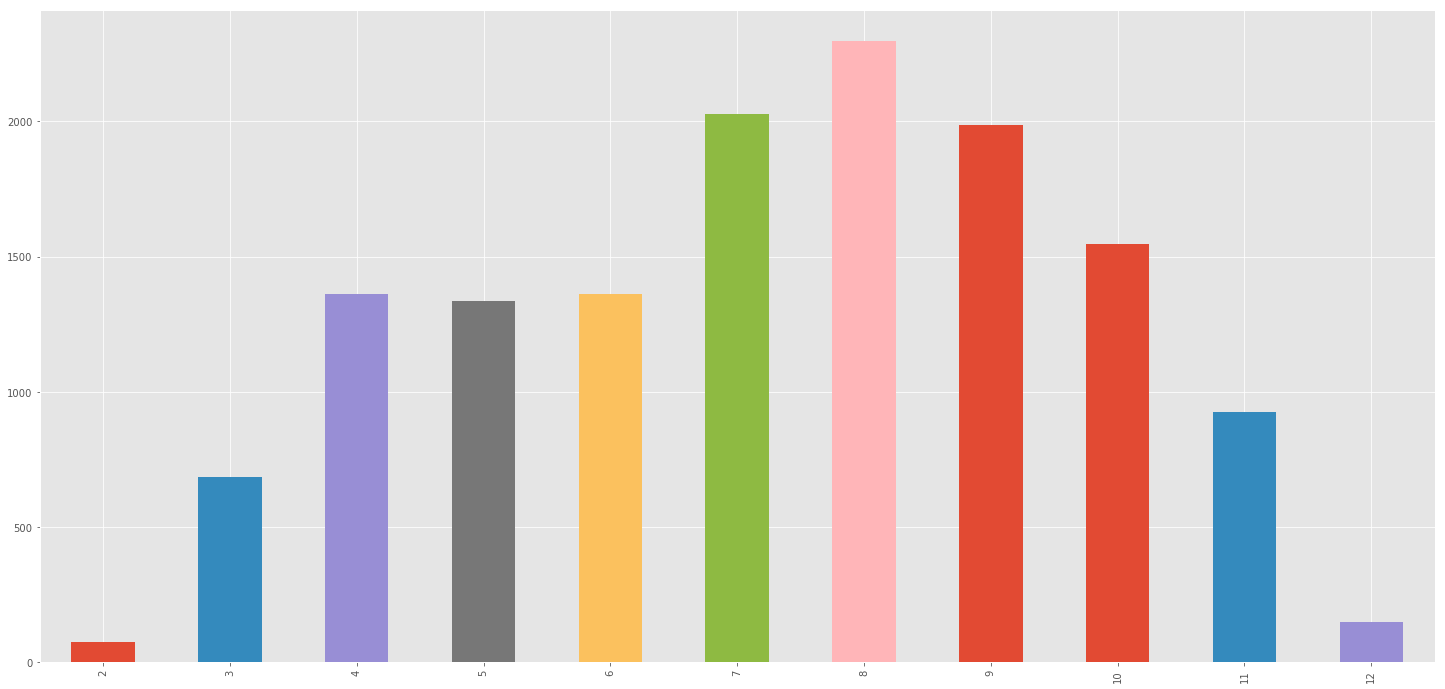

In [13]:
df_pdf_tbl1['insgesamt'].plot(kind='bar')

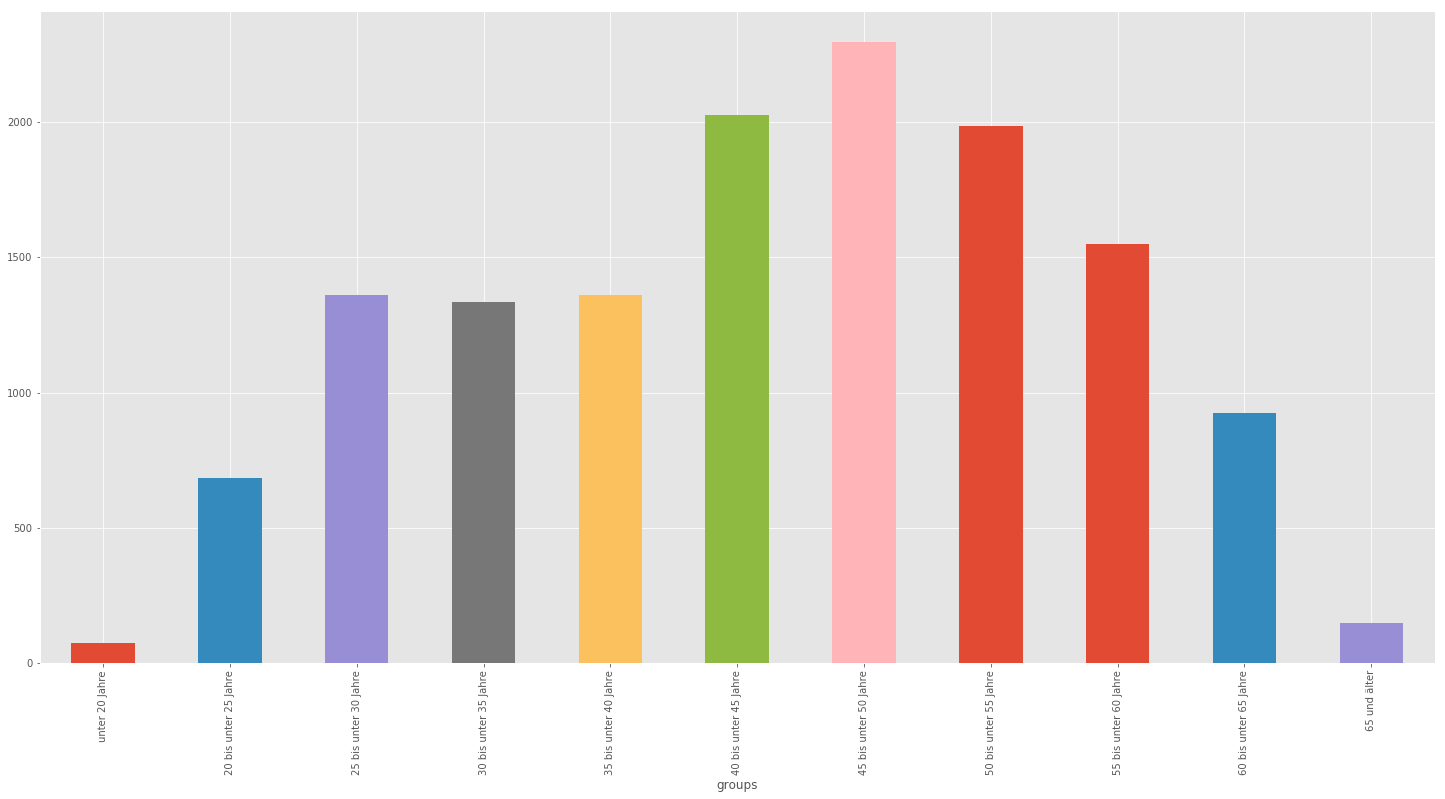

In [14]:
df_pdf_tbl1.set_index('groups')['insgesamt'].plot(kind='bar')

<hr>

## Analysis of the PDF with statistical data on people income

In [15]:
# load and parse PDF
df = tabula.read_pdf(url_people_income, encoding = 'cp1252')

# identify row index
TBL_START_ROW = 3
TBL_LAST_ROW = 17
index = [x for x in range(TBL_START_ROW, TBL_LAST_ROW)]
print(index)
df_pdf = df.iloc[index,:]

# rename columns
df_pdf.columns = ['col_{0}'.format(x+1) for x in range(len(df_pdf.columns))]
df_pdf = df_pdf.reset_index()

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


In [16]:
df_pdf

,index,col_1,col_2,col_3,col_4,col_5,col_6
0,3,NaN,NaN,TEURO TEURO,TEURO,TEURO TEURO,TEURO
1,4,S 1,S 2,S 3 S 4,S 5,S 6 S 7,S 8
2,5,0 bis 5.000 €,12.805,22.160 21.068,14.461,694 32.064,677
3,6,5.000 bis 10.000 €,6.530,50.674 49.316,37.845,1.055 49.079,1.461
4,7,10.000 bis 15.000 €,6.909,88.059 86.061,68.972,2.501 73.144,3.315
5,8,15.000 bis 20.000 €,7.082,126.766 124.062,102.155,7.377 110.484,7.789
6,9,20.000 bis 25.000 €,7.010,160.106 157.725,132.060,13.514 146.241,13.661
7,10,25.000 bis 30.000 €,6.897,191.761 189.460,160.050,19.667 180.698,20.064
8,11,30.000 bis 35.000 €,6.669,218.505 216.398,184.589,26.391 210.618,26.968
9,12,35.000 bis 50.000 €,13.423,564.159 559.454,476.176,82.523 542.763,83.482


In [17]:
df_pdf_tmp = df_pdf
df_pdf_tmp['col_3_1'], df_pdf_tmp['col_3_2'] = df_pdf_tmp['col_3'].str.split(' ', 1).str
df_pdf_tmp['col_5_1'], df_pdf_tmp['col_5_2'] = df_pdf_tmp['col_5'].str.split(' ', 1).str
df_pdf_tmp = df_pdf_tmp.reset_index()
#df_pdf_tmp
df_pdf

,index,col_1,col_2,col_3,col_4,col_5,col_6,col_3_1,col_3_2,col_5_1,col_5_2
0,3,NaN,NaN,TEURO TEURO,TEURO,TEURO TEURO,TEURO,TEURO,TEURO,TEURO,TEURO
1,4,S 1,S 2,S 3 S 4,S 5,S 6 S 7,S 8,S,3 S 4,S,6 S 7
2,5,0 bis 5.000 €,12.805,22.160 21.068,14.461,694 32.064,677,22.160,21.068,694,32.064
3,6,5.000 bis 10.000 €,6.530,50.674 49.316,37.845,1.055 49.079,1.461,50.674,49.316,1.055,49.079
4,7,10.000 bis 15.000 €,6.909,88.059 86.061,68.972,2.501 73.144,3.315,88.059,86.061,2.501,73.144
5,8,15.000 bis 20.000 €,7.082,126.766 124.062,102.155,7.377 110.484,7.789,126.766,124.062,7.377,110.484
6,9,20.000 bis 25.000 €,7.010,160.106 157.725,132.060,13.514 146.241,13.661,160.106,157.725,13.514,146.241
7,10,25.000 bis 30.000 €,6.897,191.761 189.460,160.050,19.667 180.698,20.064,191.761,189.460,19.667,180.698
8,11,30.000 bis 35.000 €,6.669,218.505 216.398,184.589,26.391 210.618,26.968,218.505,216.398,26.391,210.618
9,12,35.000 bis 50.000 €,13.423,564.159 559.454,476.176,82.523 542.763,83.482,564.159,559.454,82.523,542.763


In [18]:
def custom_replace(df, column):
    df[column] = df[column].astype(str)   # <- to let conversion to srt happen
    df[column] = df[column].apply(lambda x: x.replace('NaN', '0'))
    df[column] = df[column].apply(lambda x: x.replace('-', '0'))
    df[column] = df[column].apply(lambda x: x.replace('•', '0'))
    df[column] = df[column].apply(lambda x: x.replace('.', ''))
    #df[column] = df[column].apply(lambda x: x.replace(',', '.'))
    df[column] = df[column].astype(float) # <- to let conversion happen once

# remove top columns
df_income = df_pdf.drop([0,1])
df_income = df_income.reset_index()

# remove further columns
df_income = df_income.drop(columns = ['level_0', 'index'])
df_income = df_income.drop(columns = ['col_3', 'col_5'])

# conver columns into float
#df_columns = ['col_2','col_3','col_4','col_5','col_6', 'col_8']
df_columns = ['col_2','col_3_1','col_3_2','col_4','col_5_1', 'col_5_2', 'col_6']

for col in df_columns:
    custom_replace(df_income, col)
    #df_income[col] = df_income[col].astype(float)

df_income

,col_1,col_2,col_4,col_6,col_3_1,col_3_2,col_5_1,col_5_2
0,0 bis 5.000 €,12805.0,14461.0,677.0,22160.0,21068.0,694.0,32064.0
1,5.000 bis 10.000 €,6530.0,37845.0,1461.0,50674.0,49316.0,1055.0,49079.0
2,10.000 bis 15.000 €,6909.0,68972.0,3315.0,88059.0,86061.0,2501.0,73144.0
3,15.000 bis 20.000 €,7082.0,102155.0,7789.0,126766.0,124062.0,7377.0,110484.0
4,20.000 bis 25.000 €,7010.0,132060.0,13661.0,160106.0,157725.0,13514.0,146241.0
5,25.000 bis 30.000 €,6897.0,160050.0,20064.0,191761.0,189460.0,19667.0,180698.0
6,30.000 bis 35.000 €,6669.0,184589.0,26968.0,218505.0,216398.0,26391.0,210618.0
7,35.000 bis 50.000 €,13423.0,476176.0,83482.0,564159.0,559454.0,82523.0,542763.0
8,50.000 bis 125.000 €,14988.0,910753.0,196042.0,1102392.0,1093439.0,210298.0,995137.0
9,125.000 bis 250.000 €,1860.0,260513.0,50449.0,310856.0,307724.0,84594.0,184188.0


### Create a number of basic plots out of imported data

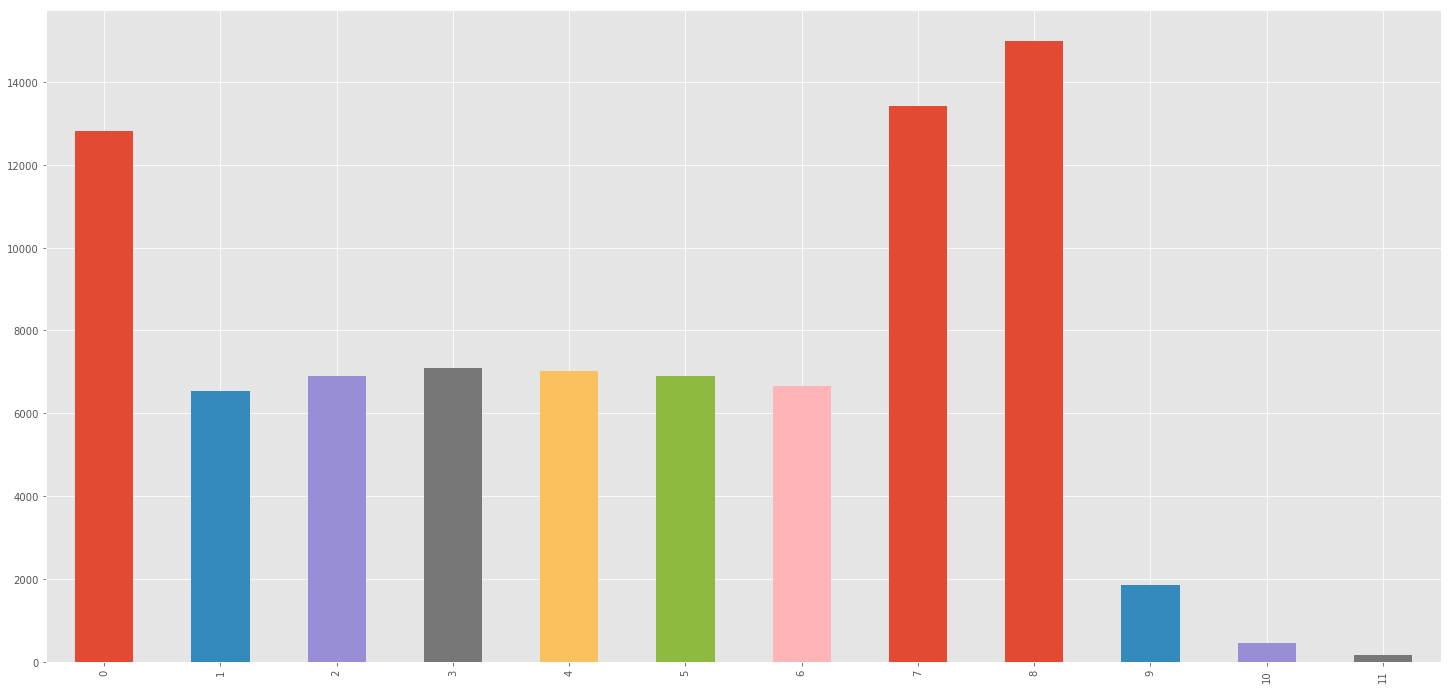

In [19]:
df_income['col_2'].plot(kind='bar') # not manipulated

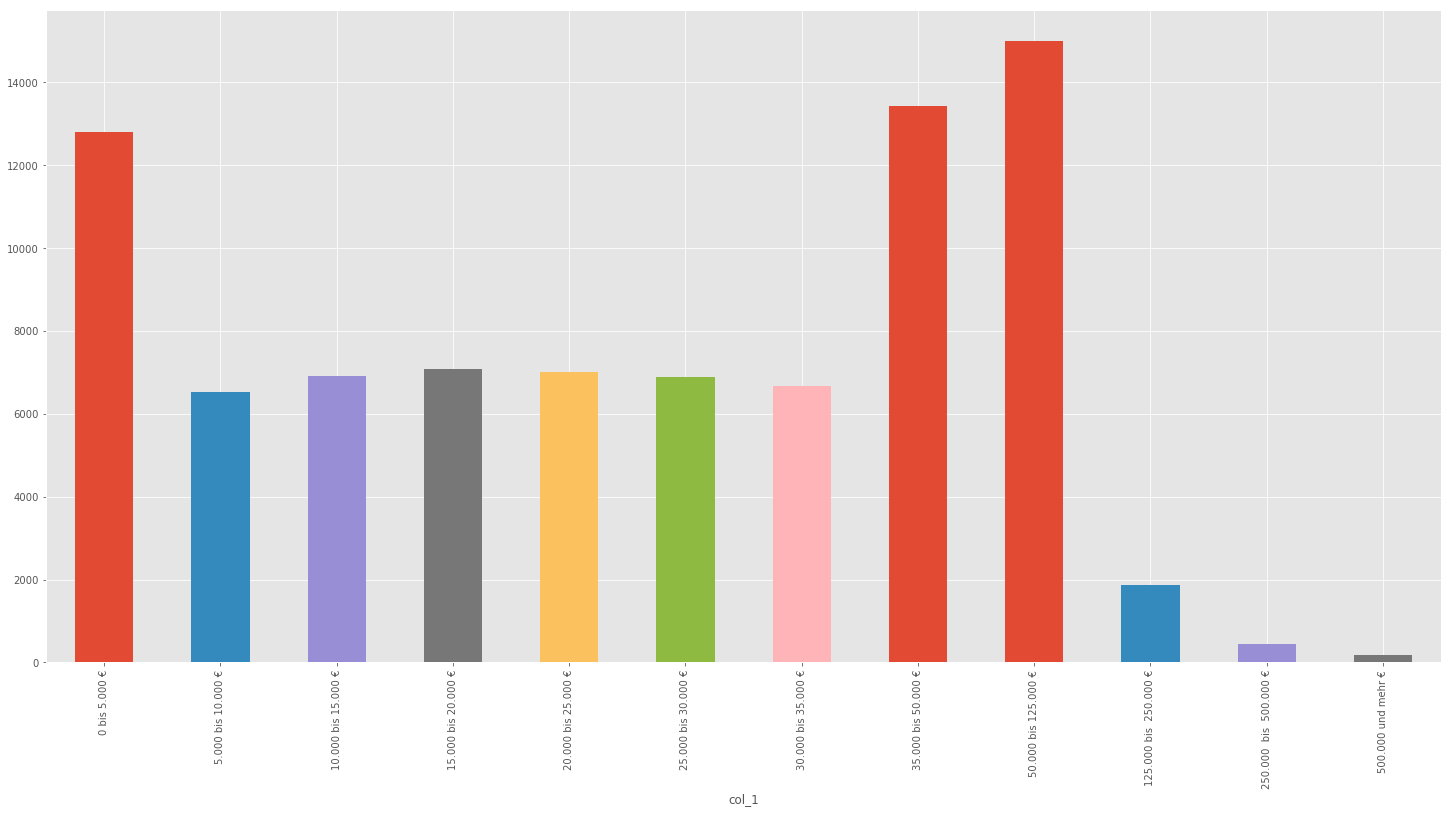

In [20]:
df_income.set_index('col_1')['col_2'].plot(kind='bar') # set_index to manipulate x-axis
#df_income

### Create more advanced plots out of imported data

A self-created coefficient (a possible example).

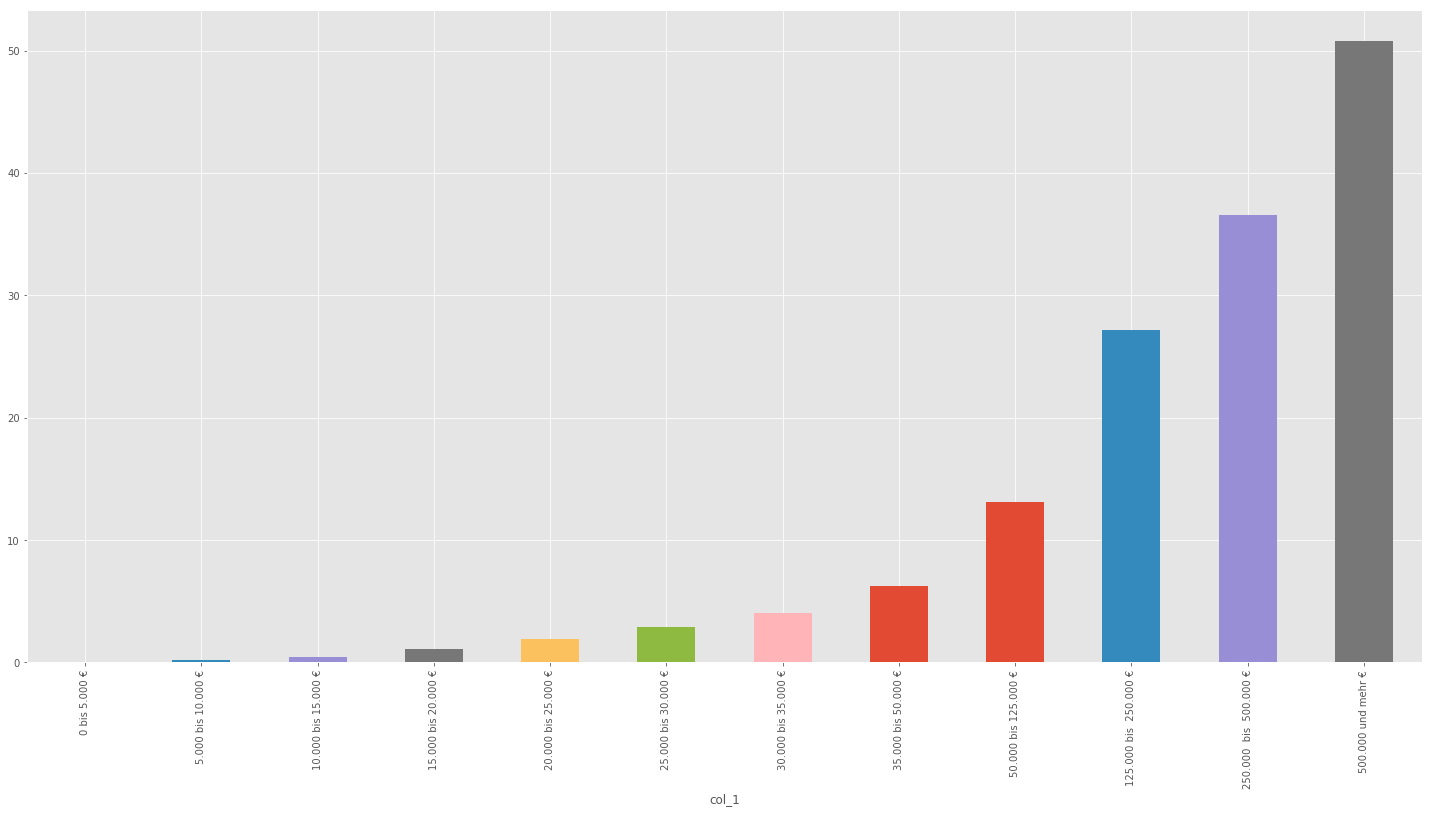

In [21]:
#df_income
df_income['tax_coefficient'] = df_income['col_6'] / df_income['col_2']
df_income.set_index('col_1')['tax_coefficient'].plot(kind='bar') # set_index to manipulate x-axis

Pre-calcualte total taxes and amount of people currently paying taxes.

In [22]:
people_total = df_income['col_2'].sum()
tax_total = df_income['col_6'].sum()

print ('Total people paying taxes: {0}.'.format(people_total))
print ('Total paid taxes (thousands): {0}'.format(tax_total))

Total people paying taxes: 84802.0.
Total paid taxes (thousands): 429417.0


Percentage of people paid taxes in each group of people (have to be for the year 2015).

Percentage: 100.0


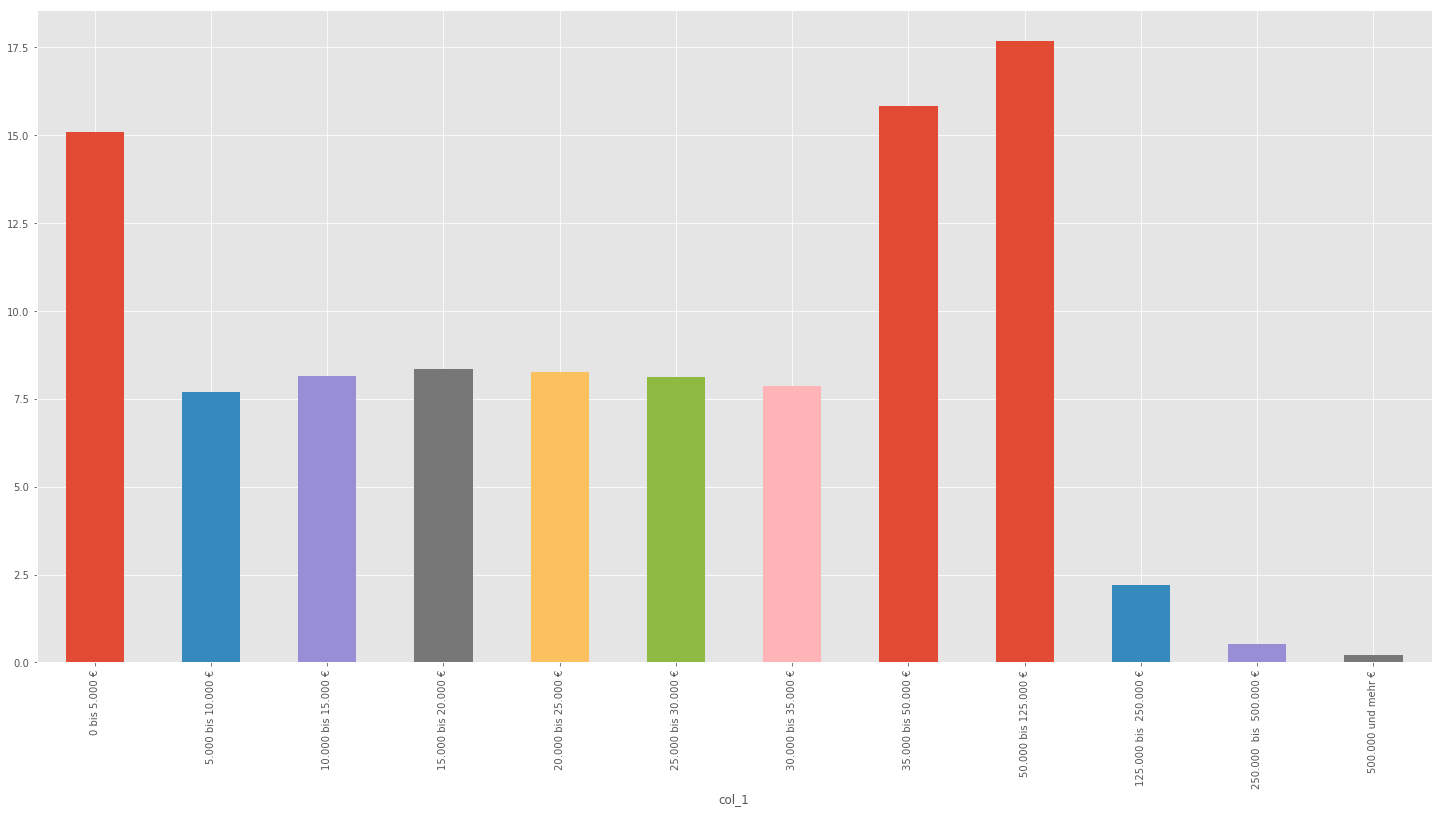

In [23]:
df_income['people_percentage'] = (df_income['col_2'] * 100) / people_total
print ('Percentage: {0}'.format(df_income['people_percentage'].sum()))
df_income.set_index('col_1')['people_percentage'].plot(kind='bar') # set_index to manipulate x-axis

Percentage of taxes paid by each group of people (have to be for the year 2015).

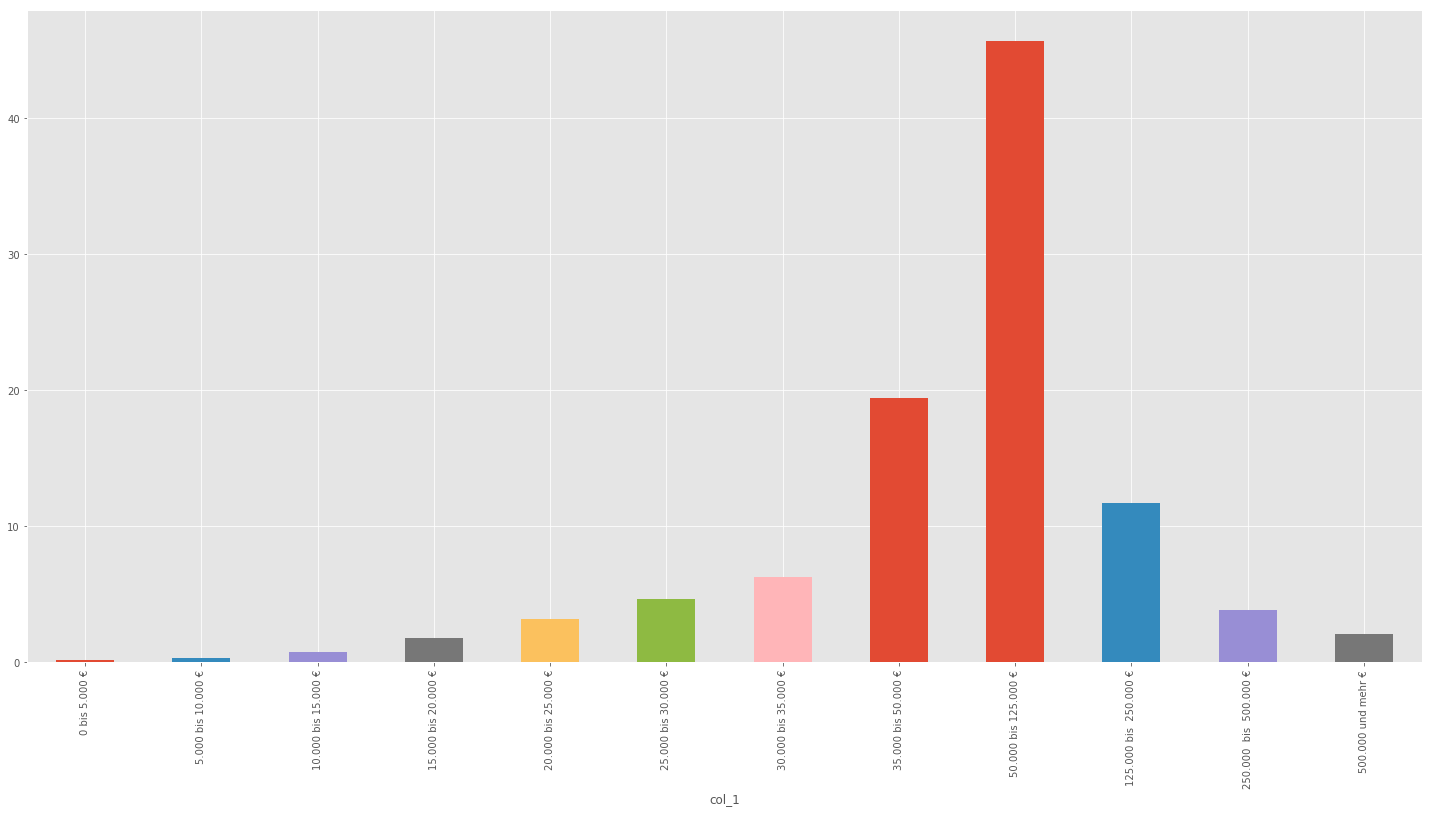

In [24]:
df_income['tax_percentage'] = (df_income['col_6'] * 100) / tax_total
df_income.set_index('col_1')['tax_percentage'].plot(kind='bar') # set_index to manipulate x-axis